<a href="https://colab.research.google.com/github/satyamgupta461/Stock-Price-Prediction/blob/main/Satyam_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial neural network (ANN) called Long Short Term Memory (LSTM)
#              to predict the opening stock price of Tata Consultancy Services(TCS) using the past 60 day stock price.

In [ ]:
import math
import numpy as np #numerical python : for working with array 
import pandas as pd #python data Analysis : use to analyse data and big data and make conclusions based on statistical theories., use for working with dataset
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential #provides a Python interface for artificial neural networks and act as a interface for the TensorFlow library.
from keras.layers import Dense, LSTM
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote 
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/DataSet_TCS/TCS_DATASET_CLEANED.csv',index_col="Date",parse_dates=True)
#pd.read_csv gives dataframes as output. 
#Show the data 
# df.tail() for the lower data 
df.head()

Mounted at /content/drive


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,377.399994,379.450012,374.524994,375.825012,1963682
2010-01-05,377.500000,379.774994,373.274994,375.924988,2014488
2010-01-06,375.924988,376.100006,366.500000,367.424988,3349176
2010-01-07,367.750000,369.700012,355.500000,357.200012,6474892
2010-01-08,358.000000,359.250000,348.250000,349.899994,6048178


In [ ]:
#Get the number of rows and columns in the data set
df.shape

(2732, 5)

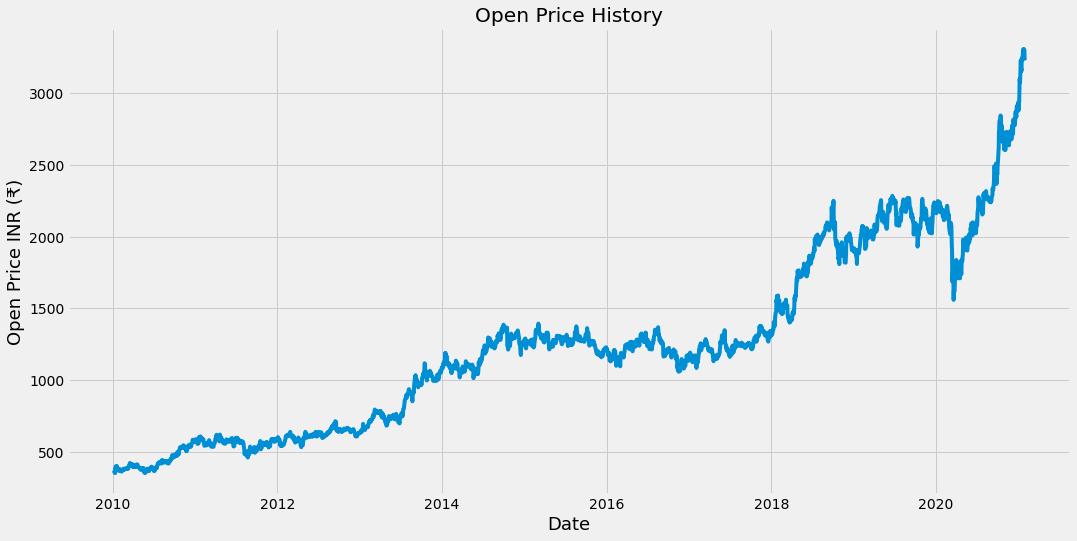

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Open Price History')
plt.plot(df['Open'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Open Price INR (₹)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Open' column
data = df.filter(['Open'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.85)#.95 or 0.8 is the percentage(95 and 70% respectively) of our test data from all dataset 

training_data_len , len(dataset)


(2323, 2732)

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00858993],
       [0.00862375],
       [0.0080911 ],
       ...,
       [1.        ],
       [0.99697325],
       [0.97330021]])

In [ ]:
#Create the scaled training data set 
#Create the training data set
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
       print(x_train)
       print(y_train)
       print()

[array([0.00858993, 0.00862375, 0.0080911 , 0.00532643, 0.00202912,
       0.        , 0.00473461, 0.00693282, 0.01597085, 0.01555657,
       0.01623294, 0.01660495, 0.01491402, 0.01154061, 0.00963831,
       0.00904648, 0.00777829, 0.00769374, 0.00507279, 0.00513197,
       0.00862375, 0.00676373, 0.00827711, 0.00524189, 0.00422733,
       0.00355096, 0.00607045, 0.00574071, 0.00777829, 0.00731328,
       0.01029778, 0.00946922, 0.00860685, 0.00896194, 0.00930012,
       0.00879284, 0.01112633, 0.01066977, 0.0098074 , 0.01099106,
       0.01082196, 0.01031468, 0.01075432, 0.0099765 , 0.01009486,
       0.01285953, 0.01623294, 0.01571721, 0.01986845, 0.02198211,
       0.02384214, 0.01712068, 0.01875244, 0.02130574, 0.02030808,
       0.02130574, 0.02029118, 0.01768714, 0.01623294, 0.01392482])]
[0.019107526652891935]

[array([0.00858993, 0.00862375, 0.0080911 , 0.00532643, 0.00202912,
       0.        , 0.00473461, 0.00693282, 0.01597085, 0.01555657,
       0.01623294, 0.01660495, 0.0

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train
x_train

array([[0.00858993, 0.00862375, 0.0080911 , ..., 0.01768714, 0.01623294,
        0.01392482],
       [0.00862375, 0.0080911 , 0.00532643, ..., 0.01623294, 0.01392482,
        0.01910753],
       [0.0080911 , 0.00532643, 0.00202912, ..., 0.01392482, 0.01910753,
        0.01773788],
       ...,
       [0.57762222, 0.55565704, 0.55902197, ..., 0.58438595, 0.59892796,
        0.61144085],
       [0.55565704, 0.55902197, 0.55371247, ..., 0.59892796, 0.61144085,
        0.62530649],
       [0.55902197, 0.55371247, 0.55902197, ..., 0.61144085, 0.62530649,
        0.63308478]])

In [ ]:
#Reshape the data into the shape accepted by the LSTM i.e. in 3-D 
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2263, 60, 1)

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2263/2263 [==============================] - 59s 25ms/step - loss: 4.6295e-04


In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ]
 #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
#Undo scaling
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

139.04136192729604

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


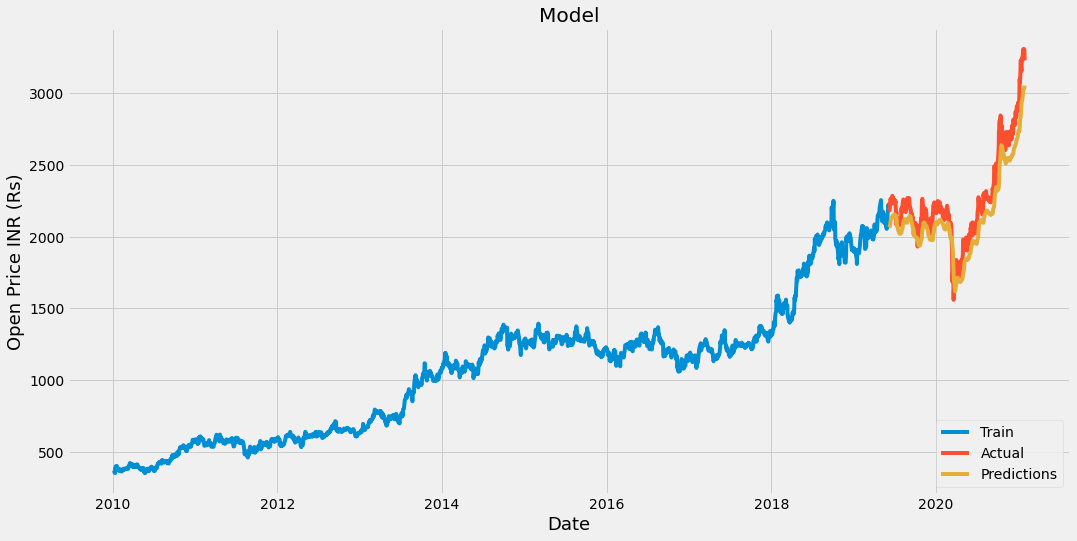

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price INR (Rs)', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Open,Predictions
Date,,
2019-06-07,2174.000000,2064.518066
2019-06-10,2196.699951,2072.933105
2019-06-11,2237.000000,2079.692627
2019-06-12,2245.000000,2089.802246
2019-06-13,2264.000000,2100.843262
...,...,...
2021-01-21,3305.000000,3005.440430
2021-01-22,3241.899902,3023.306152
2021-01-25,3308.949951,3031.106201


In [ ]:
#Get the quote 
tcs_quote = pd.read_csv('/content/drive/MyDrive/DataSet_TCS/TCS_DATASET_CLEANED.csv',index_col="Date",parse_dates=True)


In [ ]:
#Create a new dataframe
new_df = tcs_quote.filter(['Open'])
new_df


,Open
Date,
2010-01-04,377.399994
2010-01-05,377.500000
2010-01-06,375.924988
2010-01-07,367.750000
2010-01-08,358.000000
...,...
2021-01-21,3305.000000
2021-01-22,3241.899902
2021-01-25,3308.949951


In [ ]:
#Get the last 60 day closing price 
last_60_days = new_df[-60:].values

In [ ]:
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

In [ ]:
#Create an empty list
X_test = []

In [ ]:
#Append teh past 60 days
X_test.append(last_60_days_scaled)

In [ ]:
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

In [ ]:
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#Get the predicted scaled price
pred_price = model.predict(X_test)

In [ ]:
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
print("28/01/2021")

[[3052.4343]]
28/01/2021


In [ ]:
#Get the quote 
tcs_quote = pd.read_csv('/content/drive/MyDrive/DataSet_TCS/TCS_28_Jan_2021.csv',index_col="Date",parse_dates=True)

In [ ]:
#Create a new dataframe
new_df1 = tcs_quote.filter(['Open'])
new_df1

,Open
Date,
2021-01-28,3230.0
